In [1]:
import os 
import sys 
import csv 
import yaml
import pickle 
import numpy as np 
import pandas as pd 
from tqdm import tqdm 
import datetime 

In [2]:
with open('user_input.yaml' , 'r' ) as f : 
    inputs = yaml.safe_load( f ) 

In [3]:
import os

files = []
for filename in os.listdir(inputs['save_path']):
    if filename.endswith(".pkl") and filename.startswith("total"):
        full_path = os.path.join(inputs['save_path'], filename)
        files.append(full_path)

# Sort the files numerically by the number in the filename
sorted_files = sorted(files, key=lambda f: int(os.path.splitext(f)[0].split('_')[-1]))

# Now sorted_files contains the properly ordered list
print(sorted_files)

['/Users/ashmitbathla/Documents/quote-dist/data/result/total_quotes_1.pkl', '/Users/ashmitbathla/Documents/quote-dist/data/result/total_quotes_2.pkl', '/Users/ashmitbathla/Documents/quote-dist/data/result/total_quotes_3.pkl', '/Users/ashmitbathla/Documents/quote-dist/data/result/total_quotes_4.pkl', '/Users/ashmitbathla/Documents/quote-dist/data/result/total_quotes_5.pkl', '/Users/ashmitbathla/Documents/quote-dist/data/result/total_quotes_6.pkl', '/Users/ashmitbathla/Documents/quote-dist/data/result/total_quotes_7.pkl', '/Users/ashmitbathla/Documents/quote-dist/data/result/total_quotes_8.pkl', '/Users/ashmitbathla/Documents/quote-dist/data/result/total_quotes_9.pkl', '/Users/ashmitbathla/Documents/quote-dist/data/result/total_quotes_10.pkl', '/Users/ashmitbathla/Documents/quote-dist/data/result/total_quotes_11.pkl', '/Users/ashmitbathla/Documents/quote-dist/data/result/total_quotes_12.pkl', '/Users/ashmitbathla/Documents/quote-dist/data/result/total_quotes_13.pkl', '/Users/ashmitbathla

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# set default params for matplotlib : 
plt.rcParams['font.size'] = 14
plt.rcParams['lines.linewidth'] = 2
plt.rcParams["figure.figsize"] = (8,5)

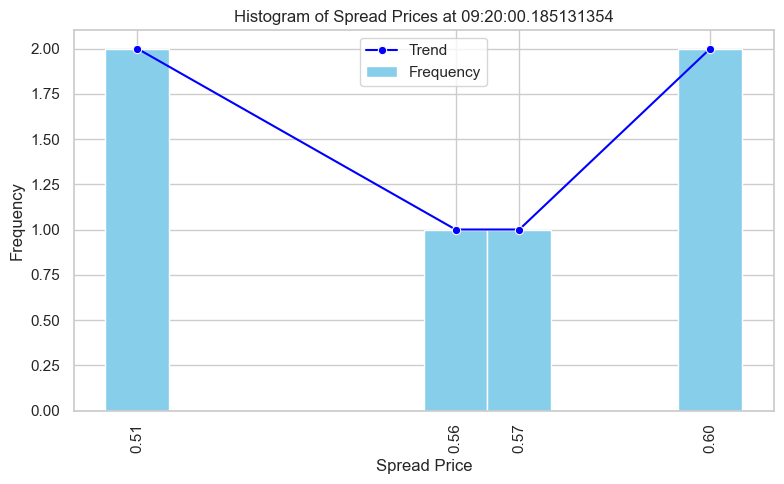

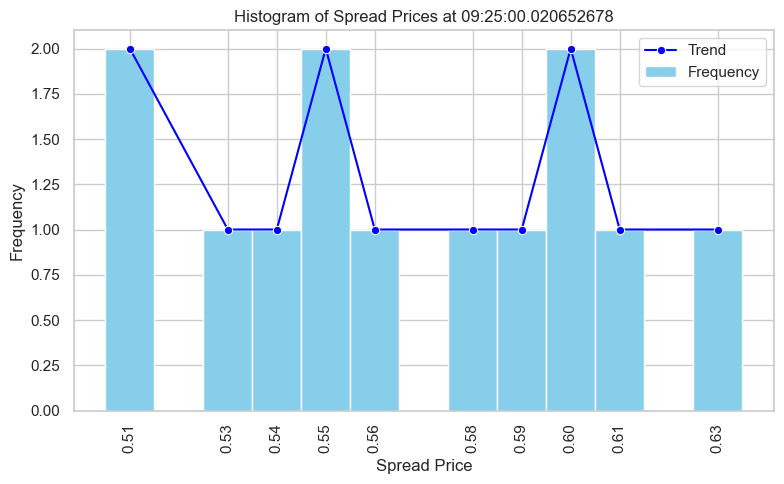

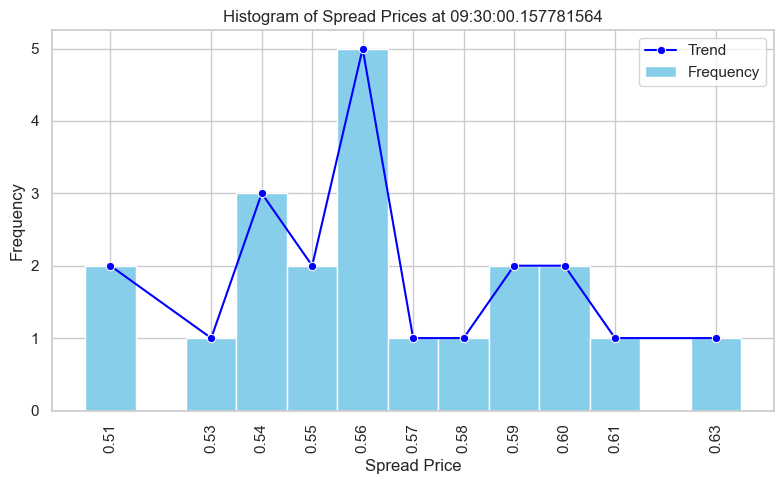

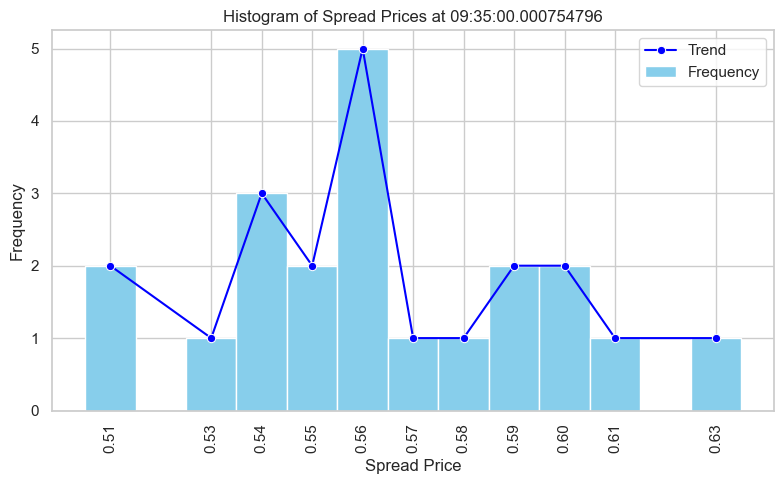

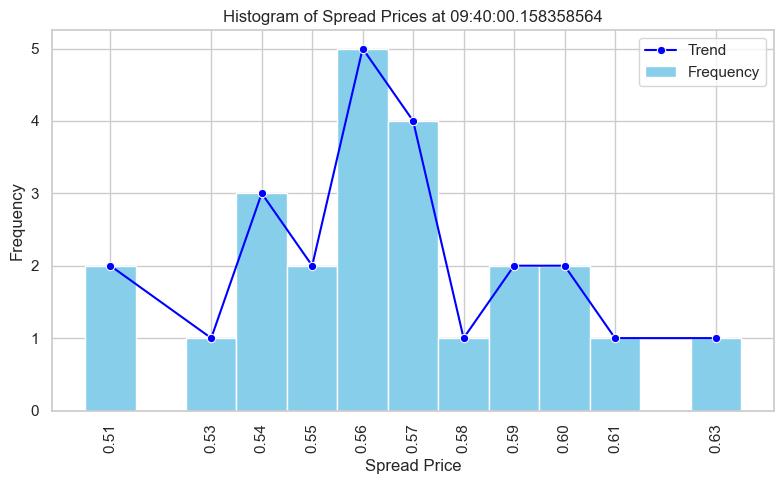

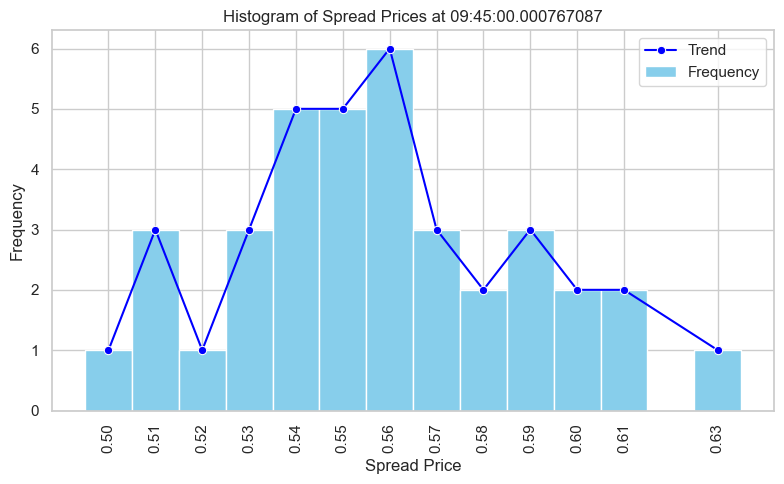

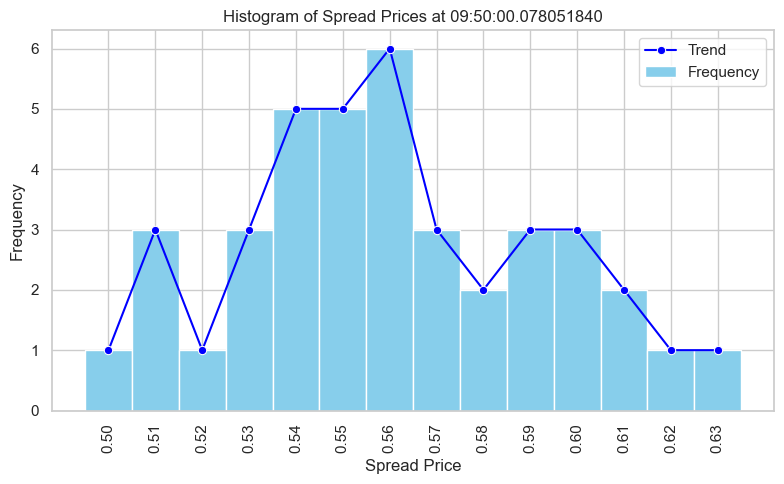

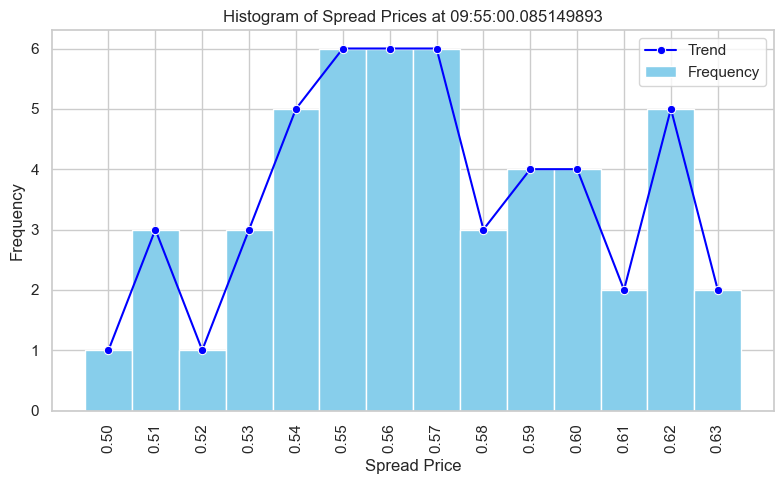

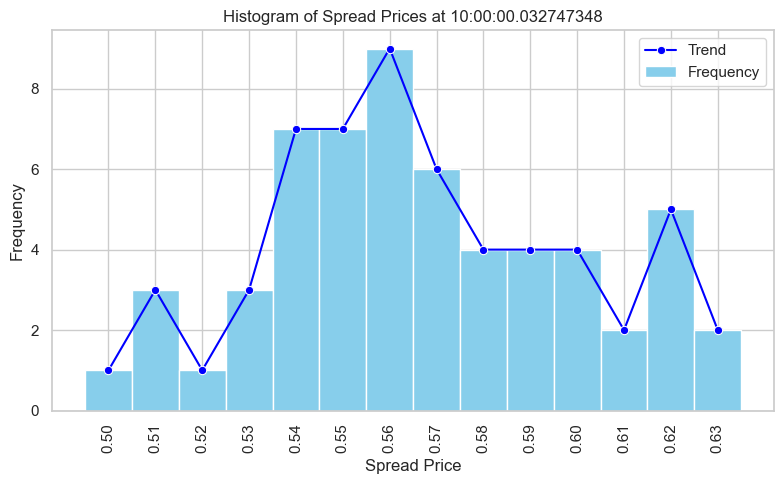

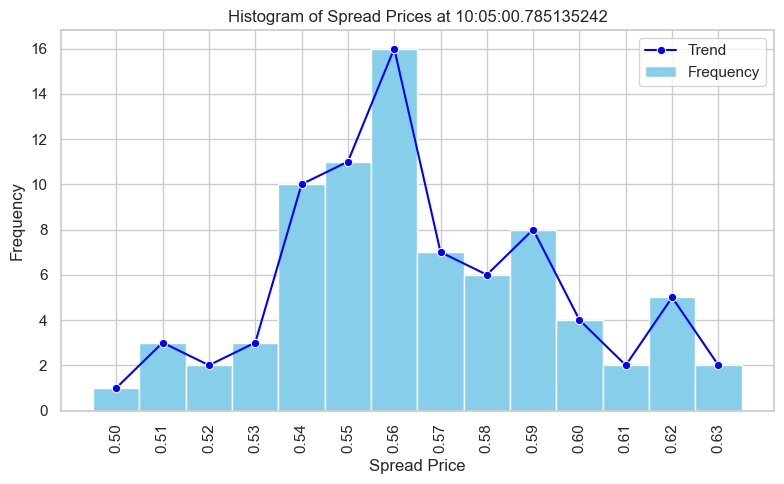

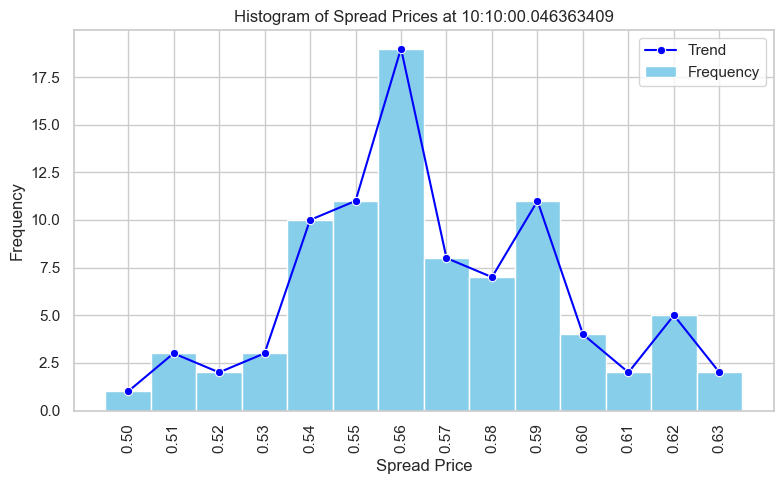

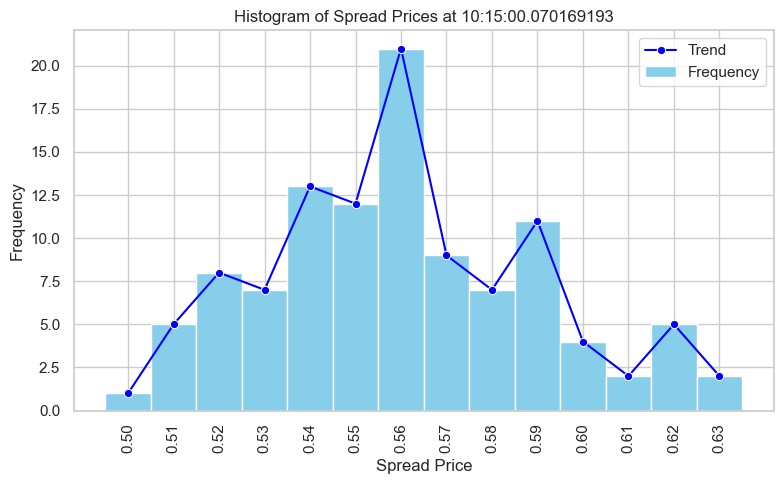

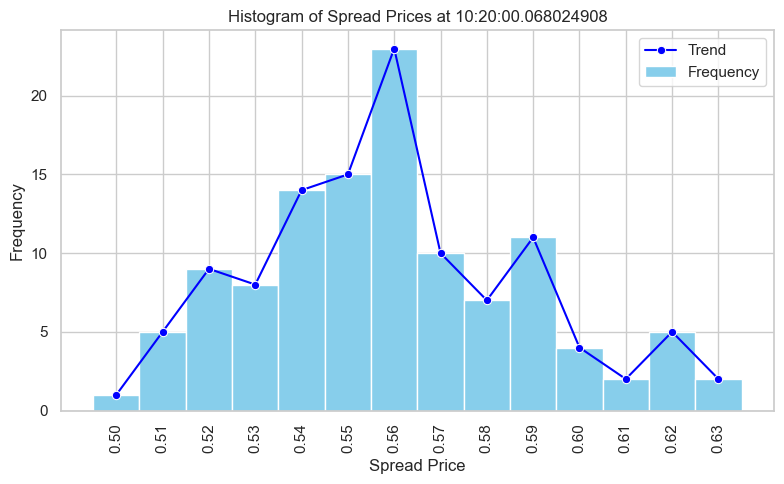

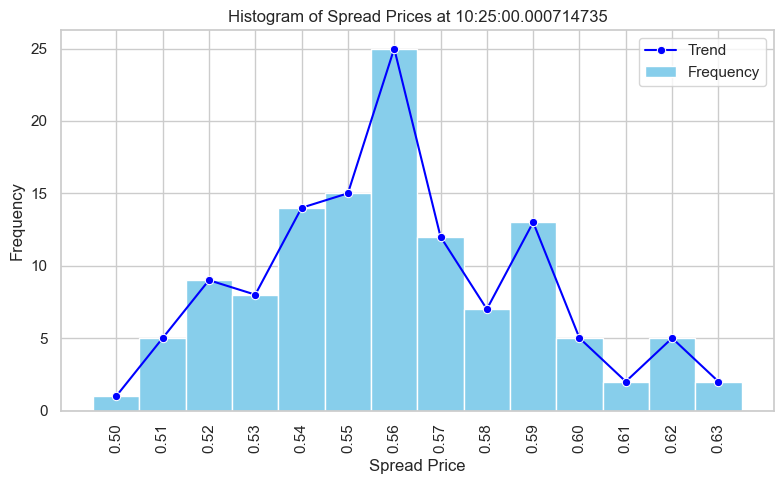

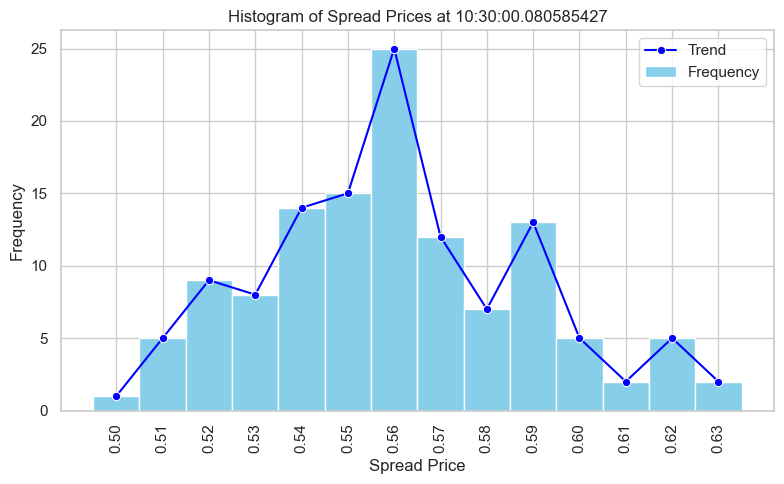

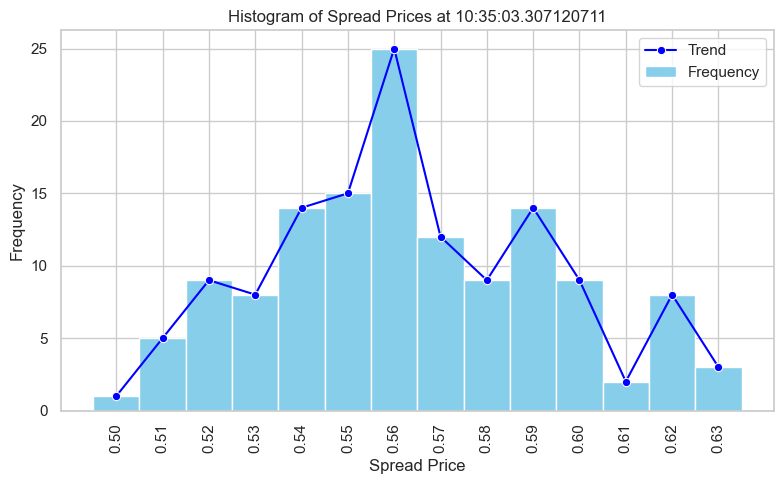

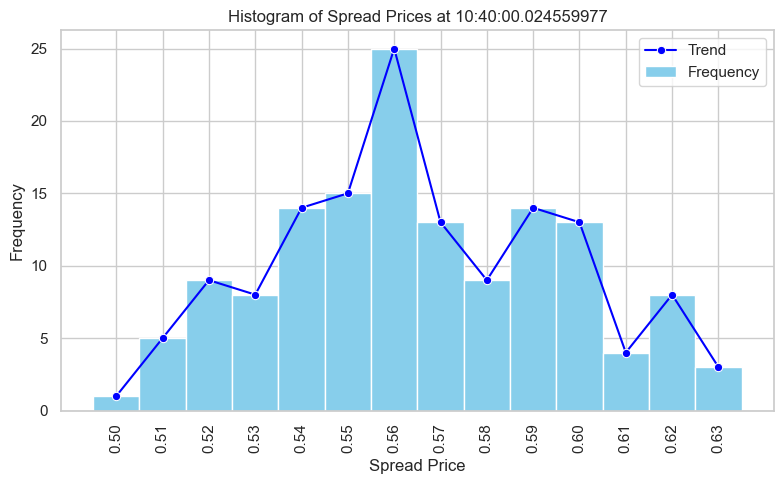

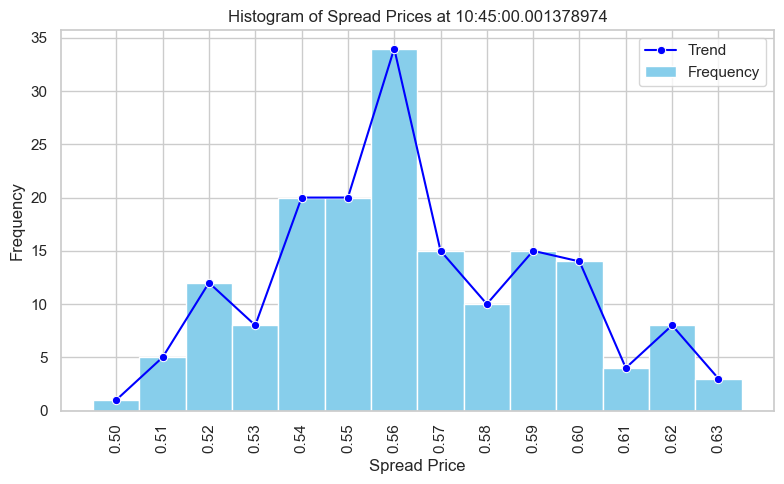

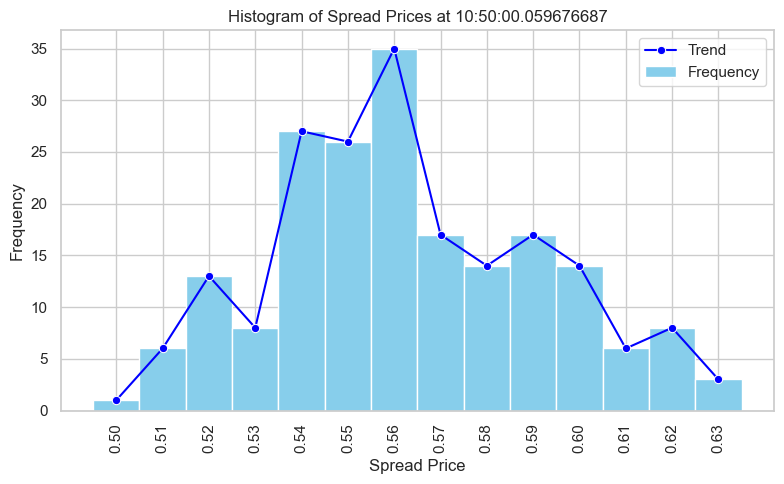

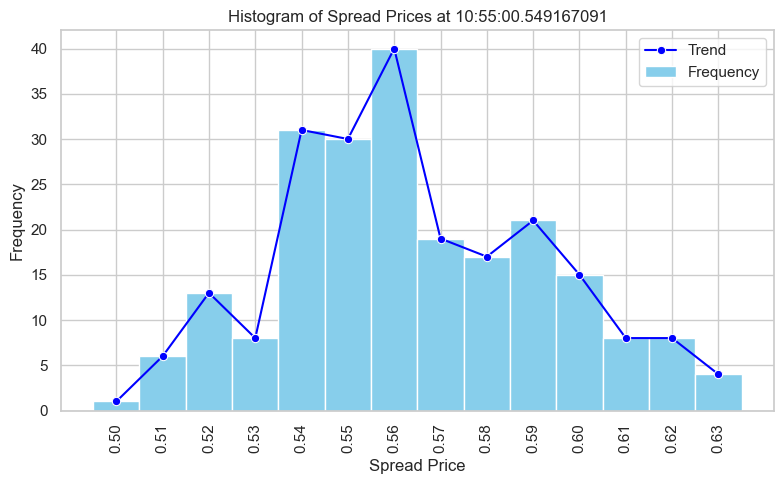

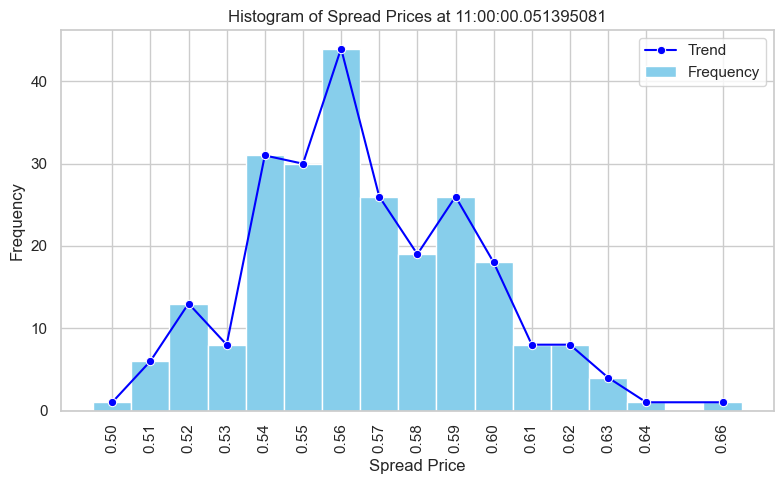

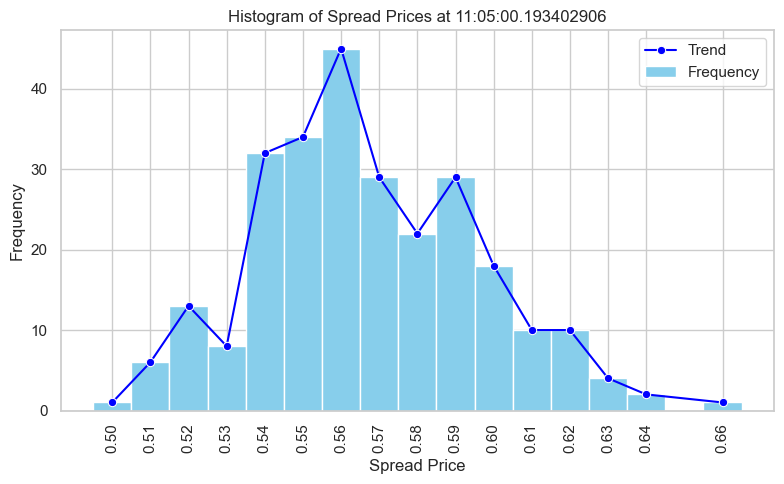

In [5]:
for file in sorted_files : 
    with open( file , 'rb' ) as f : 
        total_quotes = pickle.load( f )
        x, y = zip(*sorted(total_quotes['data'].items()))

        # Set seaborn style
        sns.set(style="whitegrid")

        # Create the bar plot
        plt.bar(x, y, color='skyblue', width=0.01, label='Frequency')

        # Overlay the line plot
        sns.lineplot(x=x, y=y, color='blue', marker="o", label='Trend')

        # Add axis labels and title
        plt.xlabel("Spread Price")
        plt.ylabel("Frequency")
        plt.title(f"Histogram of Spread Prices at {total_quotes['time']}")
        
        plt.xticks(x , rotation = 90)

        plt.legend()
        plt.tight_layout()
        plt.show()
        
        

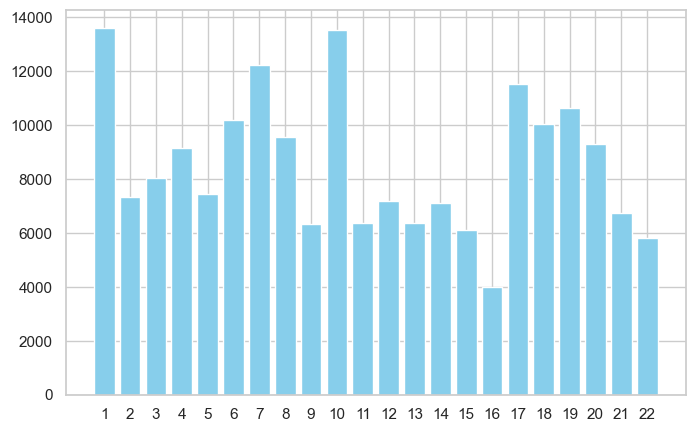

In [11]:
with open( os.path.join( inputs['save_path'] , 'new_ticks_list.pkl' ) , 'rb') as f : 
    new_ticks_list = pickle.load(f)

plt.bar(list(range(1,len(new_ticks_list)+1)), new_ticks_list, color='skyblue', label='Frequency')
plt.xticks(list(range(1,len(new_ticks_list)+1)))
plt.show()